In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [19]:
file_name = "/home/hep/lprate/projects/MuonsAndMatter/cuda_muons/data/histograms_G4_CONCRETE.pkl"
with open(file_name, 'rb') as f:
    histograms = pickle.load(f)
histograms.pop('step_length')
keys = list(histograms.keys())

In [23]:
histograms[keys[60]]['hist_2d']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(100, 100))

In [20]:
file_name = "/home/hep/lprate/projects/MuonsAndMatter/cuda_muons/data/muon_data_energy_loss_sens_G4_CONCRETE.h5"
with h5py.File(file_name, "r") as f:
    keys = sorted(list(f.keys()),key=lambda k: float(k.strip("()").split(",")[0]))
    energy_seg_1 = keys[60]
    print(energy_seg_1)
    pz1 = f[energy_seg_1]["pz"][:]
    pt1 = np.sqrt(f[energy_seg_1]["px"][:]**2 + f[energy_seg_1]["py"][:]**2)
    initial_momenta1 = f[energy_seg_1]['initial_momenta'][:]
    energy_seg_2 = keys[1]
    print(energy_seg_2)
    pz2 = f[energy_seg_2]["pz"][:]
    pt2 = np.sqrt(f[energy_seg_2]["px"][:]**2 + f[energy_seg_2]["py"][:]**2)
    initial_momenta2 = f[energy_seg_2]['initial_momenta'][:]
    energy_seg_3 = keys[2]
    print(energy_seg_3)
    pz3 = f[energy_seg_3]["pz"][:]
    pt3 = np.sqrt(f[energy_seg_3]["px"][:]**2 + f[energy_seg_3]["py"][:]**2)
    initial_momenta3 = f[energy_seg_3]['initial_momenta'][:]
    energy_seg_4 = keys[80]
    print(energy_seg_4)
    pz4 = f[energy_seg_4]["pz"][:]
    pt4 = np.sqrt(f[energy_seg_4]["px"][:]**2 + f[energy_seg_4]["py"][:]**2)
    initial_momenta4 = f[energy_seg_4]['initial_momenta'][:]
    energy_seg_5 = keys[81]
    print(energy_seg_5)
    pz5 = f[energy_seg_5]["pz"][:]
    pt5 = np.sqrt(f[energy_seg_5]["px"][:]**2 + f[energy_seg_5]["py"][:]**2)
    initial_momenta5 = f[energy_seg_5]['initial_momenta'][:]

(30.652377295742127, 33.392634984148344)
(0.19609161922920856, 0.21362179517740512)
(0.21362179517740512, 0.23271913177215398)
(169.90052273913702, 185.0892700655908)
(185.0892700655908, 201.6358592728554)


In [1]:
file_name = "/home/hep/lprate/projects/MuonsAndMatter/cuda_muons/data/muon_data_energy_loss_sens_G4_Fe.h5"
with h5py.File(file_name, "r") as f:
    keys = sorted(list(f.keys()),key=lambda k: float(k.strip("()").split(",")[0]))
    for key in keys:
        print(f"Processing {key} GeV muons")
        pt = np.sqrt(f[key]["px"][:]**2 + f[key]["py"][:]**2)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        
        # First subplot: pz and initial momenta
        axs[0].hist(f[key]['pz'], bins=100, alpha=0.5, histtype='step', color='blue', label='pz after Geant4', log=True)
        axs[0].hist(f[key]['initial_momenta'], bins=100, alpha=0.5, histtype='step', color='orange', label='Initial momenta', log=True)
        axs[0].set_title(f"pz distribution for {key} GeV muons")
        axs[0].axvline(float(key.strip("()").split(",")[0]), color='r', linestyle='dashed', linewidth=1)
        axs[0].axvline(float(key.strip("()").split(",")[1]), color='r', linestyle='dashed', linewidth=1)
        axs[0].legend()

        # Second subplot: pt
        axs[1].hist(pt, bins=100, alpha=0.5, histtype='step', color='green', label='pt', log=True)
        axs[1].set_title(f"pt distribution for {key} GeV muons")
        axs[1].legend()

        plt.tight_layout()
        plt.show()

NameError: name 'h5py' is not defined

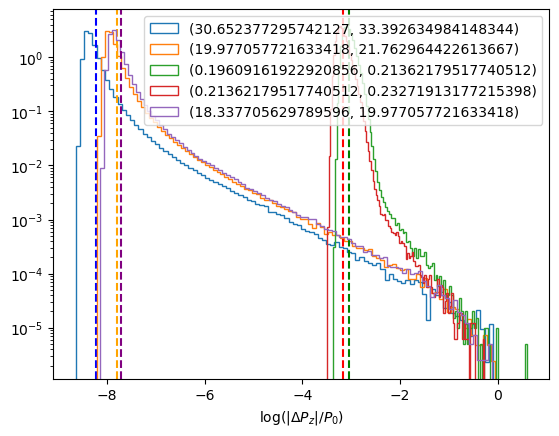

In [4]:
plt.hist(np.log(np.abs(pz1 - initial_momenta1) / initial_momenta1), histtype='step', bins=100, label=energy_seg_1, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz1 - initial_momenta1) / initial_momenta1)), color='blue', linestyle='--')
plt.hist(np.log(np.abs(pz4 - initial_momenta4) / initial_momenta4), histtype='step', bins=100, label=energy_seg_4, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz4 - initial_momenta4) / initial_momenta4)), color='orange', linestyle='--')
plt.hist(np.log(np.abs(pz2 - initial_momenta2) / initial_momenta2), histtype='step', bins=100, label=energy_seg_2, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz2 - initial_momenta2) / initial_momenta2)), color='green', linestyle='--')
plt.hist(np.log(np.abs(pz3 - initial_momenta3) / initial_momenta3), histtype='step', bins=100, label=energy_seg_3, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz3 - initial_momenta3) / initial_momenta3)), color='red', linestyle='--')
plt.hist(np.log(np.abs(pz5 - initial_momenta5) / initial_momenta5), histtype='step', bins=100, label=energy_seg_5, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz5 - initial_momenta5) / initial_momenta5)), color='purple', linestyle='--')
plt.legend()
plt.xlabel(r"log($|\Delta P_z| / P_0$)")
plt.show()

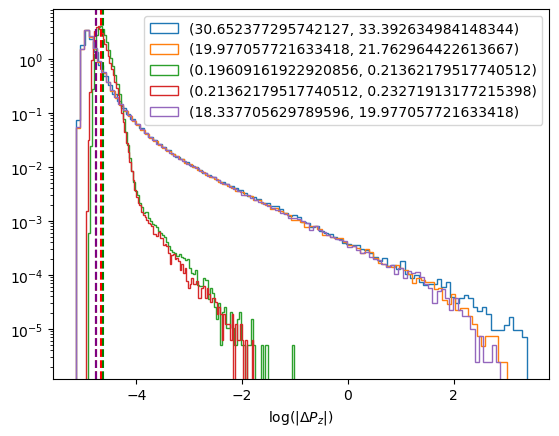

In [5]:
plt.hist(np.log(np.abs(pz1 - initial_momenta1)), histtype='step', bins=100, label=energy_seg_1, log=True, density=True)
plt.axvline(np.mean(np.log(np.abs(pz1 - initial_momenta1))), color='blue', linestyle='--')

plt.hist(np.log(np.abs(pz4 - initial_momenta4)), histtype='step', bins=100, label=energy_seg_4, log=True, density=True)
plt.axvline(np.mean(np.log(np.abs(pz4 - initial_momenta4))), color='orange', linestyle='--')

plt.hist(np.log(np.abs(pz2 - initial_momenta2)), histtype='step', bins=100, label=energy_seg_2, log=True, density=True)
plt.axvline(np.mean(np.log(np.abs(pz2 - initial_momenta2))), color='green', linestyle='--')

plt.hist(np.log(np.abs(pz3 - initial_momenta3)), histtype='step', bins=100, label=energy_seg_3, log=True, density=True)
plt.axvline(np.mean(np.log(np.abs(pz3 - initial_momenta3))), color='red', linestyle='--')

plt.hist(np.log(np.abs(pz5 - initial_momenta5)), histtype='step', bins=100, label=energy_seg_5, log=True, density=True)
plt.axvline(np.mean(np.log(np.abs(pz5 - initial_momenta5))), color='purple', linestyle='--')

plt.legend()
plt.xlabel(r"log($|\Delta P_z|$)")
plt.show()

In [6]:
def sample_from_hist(data, n_samples, bins):
    """
    Samples data from a distribution represented by a histogram.
    
    Args:
        data (np.ndarray): The original data to be histogrammed.
        n_samples (int): The number of new samples to generate.
        bins (int): The number of bins for the histogram.
        
    Returns:
        np.ndarray: The newly generated samples.
    """
    # Create the histogram to get bin heights (density) and edges
    density, bin_edges = np.histogram(data, bins=bins, density=True)
    
    # Calculate the probability of each bin (area of each bar)
    bin_widths = np.diff(bin_edges)
    bin_probabilities = density * bin_widths
    # Normalize probabilities to ensure they sum to 1
    bin_probabilities /= bin_probabilities.sum()
    
    # Choose bin indices based on their probabilities
    chosen_bin_indices = np.random.choice(len(bin_probabilities), size=n_samples, p=bin_probabilities)
    
    # For each chosen bin, return the center of the bin
    left_edges = bin_edges[chosen_bin_indices]
    right_edges = bin_edges[chosen_bin_indices + 1]
    sampled_values = (left_edges + right_edges) / 2
    
    return sampled_values



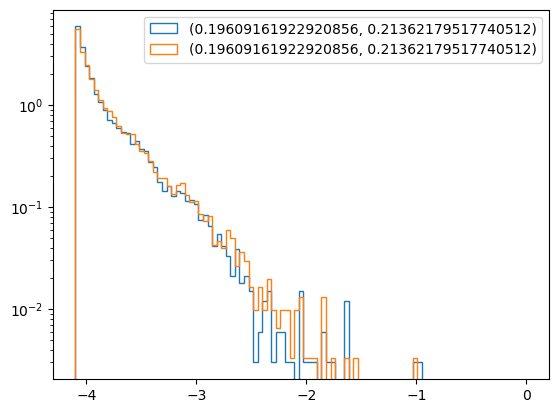

In [7]:
N = 5_000_000
hist1 = sample_from_hist(np.log(np.abs(pz1 - initial_momenta1) / initial_momenta1), N, 100)
hist1 = hist1 + np.log(initial_momenta1[:N])
hist2 = sample_from_hist(np.log(np.abs(pz2 - initial_momenta2) / initial_momenta2), N, 100)
hist2 = hist2 + np.log(initial_momenta2[:N])
hist3 = sample_from_hist(np.log(np.abs(pz3 - initial_momenta3) / initial_momenta3), N, 100)
hist3 = hist3 + np.log(initial_momenta3[:N])
hist4 = sample_from_hist(np.log(np.abs(pz4 - initial_momenta4) / initial_momenta4), N, 100)
hist4 = hist4 + np.log(initial_momenta4[:N])
hist5 = sample_from_hist(np.log(np.abs(pz5 - initial_momenta5) / initial_momenta5), N, 100)
hist5 = hist5 + np.log(initial_momenta5[:N])

bins = np.linspace(-4.1, 0, 100)
#plt.hist(hist1, histtype='step', bins=bins, label=energy_seg_1, log=True, density = True)
plt.hist(hist2, histtype='step', bins=bins, label=energy_seg_2, log=True, density = True)
#plt.hist(hist3, histtype='step', bins=bins, label=energy_seg_3, log=True, density = False)
#plt.hist(hist4, histtype='step', bins=100, label=energy_seg_4, log=True, density = True)
#plt.hist(hist5, histtype='step', bins=100, label=energy_seg_5, log=True, density = True)

#plt.hist(np.log(np.abs(pz1 - initial_momenta1)), histtype='step', bins=bins, label=energy_seg_1, log=True, density=True)
plt.hist(np.log(np.abs(pz2 - initial_momenta2)), histtype='step', bins=bins, label=energy_seg_2, log=True, density=True)
#plt.hist(np.log(np.abs(pz3 - initial_momenta3)), histtype='step', bins=bins, label=energy_seg_3, log=True, density=True)
#plt.hist(np.log(np.abs(pz4 - initial_momenta4)), histtype='step', bins=100, label=energy_seg_4, log=True, density=True)
#plt.hist(np.log(np.abs(pz5 - initial_momenta5)), histtype='step', bins=100, label=energy_seg_5, log=True, density=True)

plt.legend()
plt.show()

In [8]:
(np.log(np.abs(pz3-initial_momenta3)/initial_momenta3)<0).sum()

np.int64(5000000)

In [9]:
pz3>initial_momenta3

array([False, False, False, ..., False, False, False], shape=(5000000,))

In [10]:
initial_momenta3[pz3<0]

array([], dtype=float64)

In [11]:
pz3[pz3<0]

array([], dtype=float64)

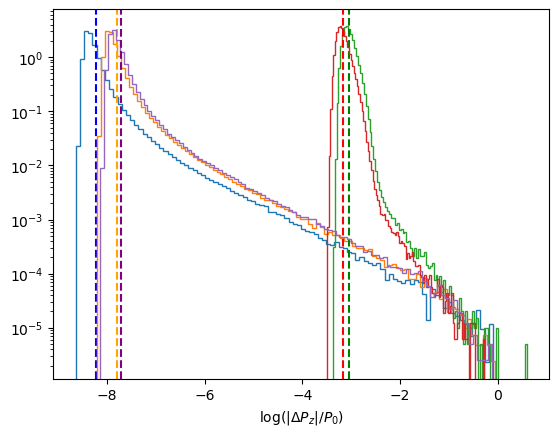

In [12]:
plt.hist(np.log(np.abs(pz1 - initial_momenta1) / initial_momenta1), histtype='step', bins=100, label=energy_seg_1, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz1 - initial_momenta1) / initial_momenta1)), color='blue', linestyle='--', label=f"{energy_seg_1} mean")
plt.hist(np.log(np.abs(pz4 - initial_momenta4) / initial_momenta4), histtype='step', bins=100, label=energy_seg_4, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz4 - initial_momenta4) / initial_momenta4)), color='orange', linestyle='--', label=f"{energy_seg_4} mean")
plt.hist(np.log(np.abs(pz2 - initial_momenta2) / initial_momenta2), histtype='step', bins=100, label=energy_seg_2, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz2 - initial_momenta2) / initial_momenta2)), color='green', linestyle='--', label=f"{energy_seg_2} mean")
plt.hist(np.log(np.abs(pz3 - initial_momenta3) / initial_momenta3), histtype='step', bins=100, label=energy_seg_3, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz3 - initial_momenta3) / initial_momenta3)), color='red', linestyle='--', label=f"{energy_seg_3} mean")
plt.hist(np.log(np.abs(pz5 - initial_momenta5) / initial_momenta5), histtype='step', bins=100, label=energy_seg_5, log=True, density = True)
plt.axvline(np.mean(np.log(np.abs(pz5 - initial_momenta5) / initial_momenta5)), color='purple', linestyle='--', label=f"{energy_seg_5} mean")
#plt.legend()
plt.xlabel(r"log($|\Delta P_z| / P_0$)")
plt.show()

In [13]:
p0 = []
dp = []
with h5py.File(file_name, "r") as f:
    for energy_seg in f.keys():
        pz = f[energy_seg]["pz"][:]
        initial_momenta = f[energy_seg]['initial_momenta'][:]
        delta_pz = -(pz - initial_momenta)# / initial_momenta
        p0.append(np.mean(initial_momenta))
        dp.append(np.mean(delta_pz))
p0 = np.stack(p0)
dp = np.stack(dp)

Text(0, 0.5, 'log($|\\Delta P_z|$)')

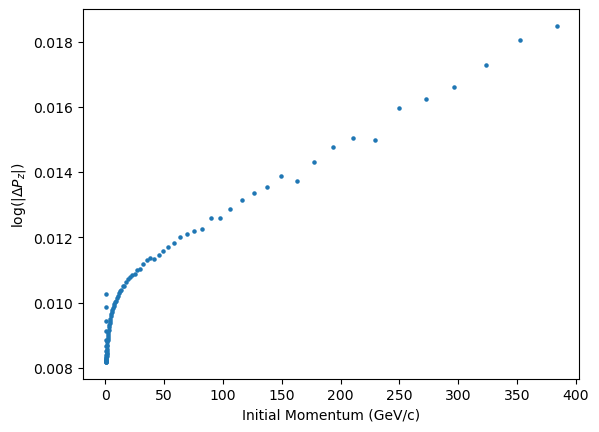

In [14]:
plt.scatter(p0.flatten(), dp, s=5, alpha=1.0)
#plt.plot(p0_old.flatten(), np.log(np.abs(dp_old/p0_old)).flatten(),linestyle = '-o', color='red')
#plt.xlim(0,40)
#plt.xscale('log')
plt.xlabel("Initial Momentum (GeV/c)")
plt.ylabel(r"log($|\Delta P_z|$)")

In [15]:
p0 = []
dp = []
dpt = []
with h5py.File(file_name, "r") as f:
    for energy_seg in f.keys():
        pz = f[energy_seg]["pz"][:]
        pt = np.sqrt(f[energy_seg]["px"][:]**2 + f[energy_seg]["py"][:]**2)
        initial_momenta = f[energy_seg]['initial_momenta'][:]
        delta_pz = (pz - initial_momenta)
        p0.append(np.mean(initial_momenta).item())
        dp.append(np.mean(np.log(np.abs(delta_pz / initial_momenta))).item())
        dpt.append(np.mean(np.log(np.abs(pt / initial_momenta))).item())
p0 = np.array(p0)
dp = np.array(dp)
dpt = np.array(dpt)
sort_idx = np.argsort(p0)
p0 = p0[sort_idx]
dp = dp[sort_idx]
dpt = dpt[sort_idx]


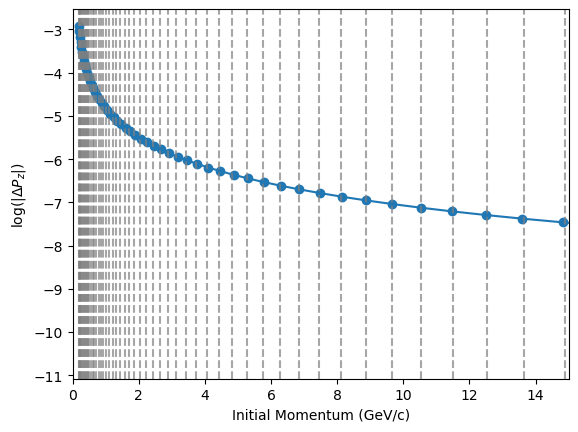

In [16]:
plt.plot(p0.flatten(), dp, '-o')
plt.xlabel("Initial Momentum (GeV/c)")
plt.ylabel(r"log($|\Delta P_z|$)")

bins = np.logspace(np.log10(0.18), np.log10(400), 90)
for bound in bins:
    plt.axvline(bound, color='gray', linestyle='--', alpha=0.7)
plt.xlim(0, 15)
#plt.ylim(-4, -1)
plt.show()

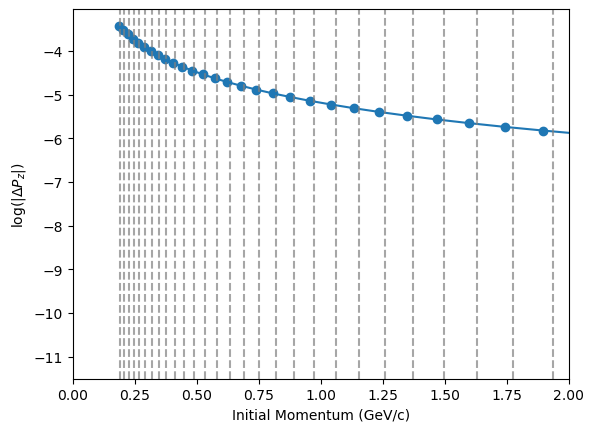

In [17]:
plt.plot(p0.flatten(), dpt, '-o')
plt.xlabel("Initial Momentum (GeV/c)")
plt.ylabel(r"log($|\Delta P_z|$)")

bins = np.logspace(np.log10(0.19), np.log10(400), 90)
for bound in bins:
    plt.axvline(bound, color='gray', linestyle='--', alpha=0.7)
plt.xlim(0, 2)
plt.show()

In [18]:
def calculate_stopping_power(p, m, z, material):
    """
    Calculates the stopping power (-dE/dx) in MeV g^-1 cm^2 using the Bethe-Bloch formula.

    This function includes the density effect correction using the Sternheimer parameterization.

    Args:
        p (float or np.array): Momentum of the incident particle in MeV/c.
        m (float): Mass of the incident particle in MeV/c^2.
        z (float): Charge of the incident particle (e.g., 1.0 for a muon).
        material (dict): A dictionary containing the properties of the target material.
    """
    # --- Physical Constants ---
    # Classical electron radius squared * Avogadro * electron mass
    K_over_A = 0.307075  # MeV mol^-1 cm^2
    m_e = 0.510998      # Electron mass in MeV/c^2

    # --- Relativistic Kinematics ---
    # Ensure p is a numpy array for vectorized operations
    p = np.atleast_1d(p)
    
    # Total energy E = sqrt(p^2 + m^2)
    E = np.sqrt(p**2 + m**2)
    
    # Beta (v/c) and Gamma (Lorentz factor)
    beta_sq = p**2 / E**2
    gamma = E / m
    
    # Clamp beta_sq to prevent log(negative) or division by zero at very low energies
    beta_sq[beta_sq < 1e-12] = 1e-12

    # --- Bethe-Bloch Calculation ---
    # 1. Maximum energy transfer to an electron in a single collision
    T_max = (2 * m_e * beta_sq * gamma**2) / (1 + 2 * gamma * (m_e / m) + (m_e / m)**2)

    # 2. Main logarithmic term of the Bethe-Bloch formula
    log_term = 0.5 * np.log((2 * m_e * beta_sq * gamma**2 * T_max) / (material['I']**2))

    # 3. Density effect correction (Sternheimer parameterization)
    X = np.log10(p / m)  # Corresponds to log10(beta*gamma)
    C_bar = material['sternheimer']['C_bar']
    X0 = material['sternheimer']['X0']
    X1 = material['sternheimer']['X1']
    a = material['sternheimer']['a']
    k = material['sternheimer']['k']
    
    delta = np.zeros_like(X)
    # Condition for the high-energy region
    mask_high = X >= X1
    # Condition for the intermediate region
    mask_mid = (X >= X0) & (X < X1)
    
    delta[mask_high] = 2 * np.log(10) * X[mask_high] - C_bar
    delta[mask_mid] = 2 * np.log(10) * X[mask_mid] - C_bar + a * (X1 - X[mask_mid])**k
    
    # 4. Combine all terms to get the stopping power
    # The term Z/A * 1/beta^2 is outside the brackets
    dEdx = K_over_A * z**2 * (material['Z'] / material['A']) * (1 / beta_sq)
    dEdx *= (log_term - beta_sq - delta / 2.0)

    # Return mass stopping power in MeV g^-1 cm^2
    return dEdx



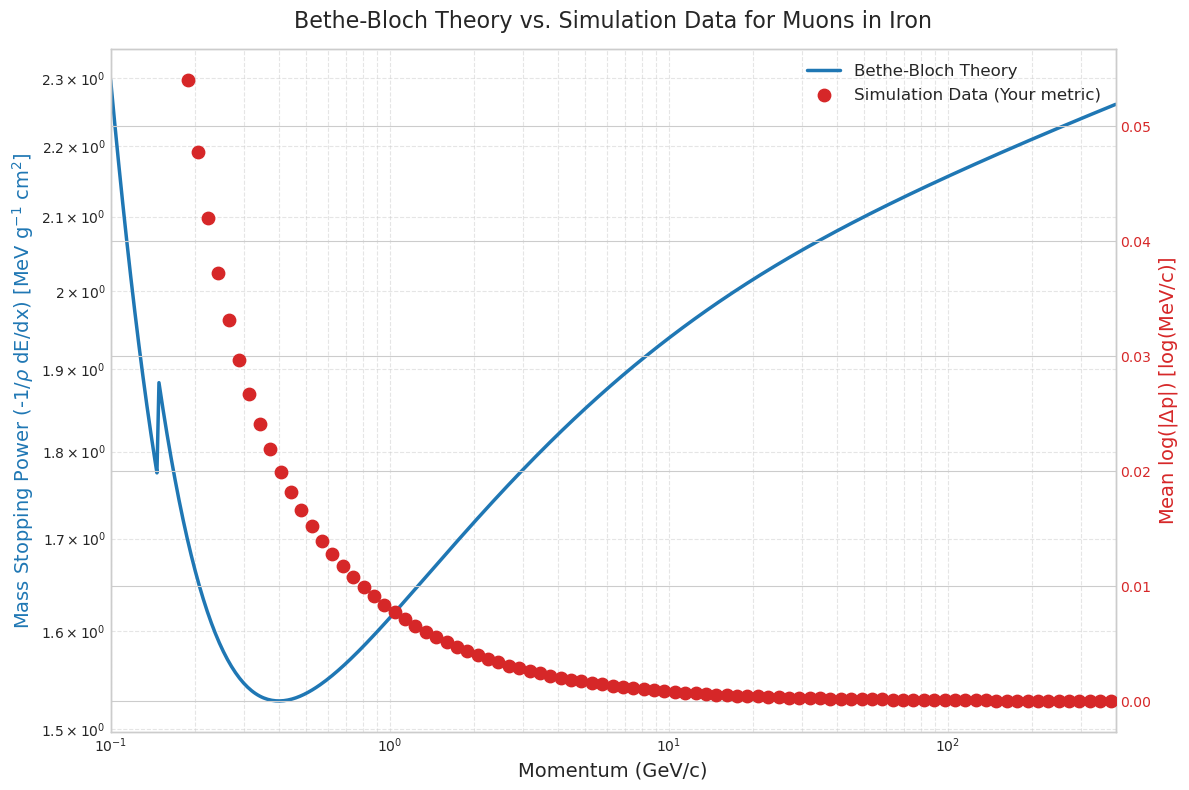

In [19]:
MUON = {
    'm': 105.658,  # Rest mass in MeV/c^2
    'z': 1.0       # Charge in units of elementary charge
}

# Material properties: Iron (Fe)
IRON = {
    'Z': 26.0,
    'A': 55.845,       # Molar mass in g/mol
    'I': 286.0 * 1e-6, # Mean excitation energy in MeV (from eV)
    'density': 7.874,  # g/cm^3
    # Sternheimer parameters for the density effect correction (from PDG)
    'sternheimer': {
        'C_bar': 4.4098,
        'X0': 0.1479,
        'X1': 3.0055,
        'a': 0.09358,
        'k': 3.1609
    }
}

# --- Plotting Setup ---
# Momentum range for the theoretical plot
p_gev_theory = np.logspace(np.log10(0.1), np.log10(400), 500) # 0.1 to 400 GeV/c
p_mev_theory = p_gev_theory * 1000 # Convert to MeV/c for the calculation

# Calculate theoretical stopping power over the momentum range
theoretical_stopping_power = calculate_stopping_power(p_mev_theory, MUON['m'], MUON['z'], IRON)

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the theoretical Bethe-Bloch curve on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Momentum (GeV/c)', fontsize=14)
ax1.set_ylabel(r'Mass Stopping Power (-1/$\rho$ dE/dx) [MeV g$^{-1}$ cm$^2$]', color=color, fontsize=14)
ax1.plot(p_gev_theory, theoretical_stopping_power, color=color, lw=2.5, label='Bethe-Bloch Theory')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_yscale('log')

# Create a second y-axis to plot the simulation data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(r'Mean log(|$\Delta$p|) [log(MeV/c)]', color=color, fontsize=14)
# Convert simulation momentum from MeV/c to GeV/c for plotting
ax2.scatter(p0, np.exp(dp), color=color, marker='o', s=80, zorder=5, label='Simulation Data (Your metric)')
ax2.tick_params(axis='y', labelcolor=color)

# Formatting the plot
ax1.set_title('Bethe-Bloch Theory vs. Simulation Data for Muons in Iron', fontsize=16, pad=15)
ax1.grid(True, which="both", ls="--", alpha=0.5)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best', fontsize=12)

# Set plot limits
ax1.set_xlim(0.1, 400)

plt.tight_layout()
plt.show()